Basic Exploratory Data Analysis

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\admin'\AppData\Local\Temp\ipykernel_12284\1229163428.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
acc = pd.read_csv('../input/civil-aviation-accidents/aviation-accident.csv')
acc.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/civil-aviation-accidents/aviation-accident.csv'

In [ ]:
acc.tail()

,date,type,registration,operator,fatalities,location,country,cat,year
23912,16-FEB-2023,Cessna 208 Cargomaster,CX-MAX,AeromÃ¡s,0,"near Berisso, BA",Argentina,A1,2023
23913,17-FEB-2023,Honda HA-420 HondaJet,N14QB,Haedo Air LLC,0,Houston-William ...,USA,A2,2023
23914,22-FEB-2023,Beech B200 Super King Air,N55PC,CTEH,5,near Little Rock-Bill...,USA,A1,2023
23915,28-FEB-2023,Cessna 208B Grand Caravan,C-GMVB,ZAM Air Service,2,"near Nakina, ON",Canada,A1,2023
23916,01-APR-2023,Cessna 750 Citation X,N85AV,Bank of Utah Trustee,0,Belmar/Farmingda...,USA,A2,2023


In [ ]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23917 entries, 0 to 23916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23917 non-null  object
 1   type          23917 non-null  object
 2   registration  22365 non-null  object
 3   operator      23913 non-null  object
 4   fatalities    19935 non-null  object
 5   location      22959 non-null  object
 6   country       23917 non-null  object
 7   cat           23917 non-null  object
 8   year          23917 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


Since the data is about aviation accidents, we can say there there are 23917 accidents in total in this dataset.

In [ ]:
#let's replace those "date unk." to NaT values
acc.replace('date unk.', np.nan, inplace=True)

In [ ]:
acc.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,NaN,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,NaN,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,NaN,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,NaN,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,NaN,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
acc['date'] = pd.to_datetime(acc['date'], errors='coerce')

/tmp/ipykernel_33/1096197793.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acc['date'] = pd.to_datetime(acc['date'], errors='coerce')


In [ ]:
# number of incidents by aircraft type
acc.groupby('type')['cat'].count()

type
A.W. AW-650 Argosy 101           3
A.W. AW-650 Argosy 102           1
A.W. AW-650 Argosy 222           4
A.W. AW-660 Argosy C.1           5
A.W. AW.15 Atalanta              3
                                ..
Yakovlev Yak-42D                 6
de Havilland  DH-106 Comet 4     6
lyushin Il-76TD                  1
unknown                         34
unknown jetliner                 1
Name: cat, Length: 3193, dtype: int64

In [ ]:
# top 10 number of incidents by aircraft type
acc.groupby('type').size().nlargest(10)

type
Douglas C-47A (DC-3)         1915
Douglas C-47 (DC-3)           669
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Junkers Ju-52/3m              472
Antonov An-2R                 391
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          257
Cessna 208B Grand Caravan     245
dtype: int64

In [ ]:
# number of incidents by country
acc.groupby('country')['cat'].count()

country
?                  19
Afghanistan       124
Albania             6
Algeria            95
American Samoa      6
                 ... 
Vietnam           320
Western Sahara      6
Yemen              66
Zambia             20
Zimbabwe           25
Name: cat, Length: 232, dtype: int64

In [ ]:
# number of fatalities by country
acc.groupby('country')['fatalities'].sum()

country
?                    4.0
Afghanistan        967.0
Albania             15.0
Algeria            863.0
American Samoa      98.0
                   ...  
Vietnam           2135.0
Western Sahara      13.0
Yemen              217.0
Zambia              78.0
Zimbabwe           117.0
Name: fatalities, Length: 232, dtype: float64

In [ ]:
# top 10 number of fatalities by country
acc.groupby('country')['fatalities'].sum().nlargest(10)

country
USA               14424.0
Russia             9426.0
Colombia           3268.0
France             3244.0
India              3136.0
Brazil             3089.0
Atlantic Ocean     2900.0
Indonesia          2762.0
Spain              2757.0
China              2609.0
Name: fatalities, dtype: float64

Interesting, let's look at the percentage total that these countries contribute towards.
To do that, we have to convert the str object to a numeric object, which allows us to compute the percentage

In [ ]:
# percentage of fatalities by country

percentage_fatalities = pd.DataFrame(acc, columns = ['country','fatalities']).groupby('country').sum()

percentage_fatalities['fatalities'] = pd.to_numeric(percentage_fatalities['fatalities'], errors='coerce')
percentage_fatalities['percent'] = (percentage_fatalities['fatalities']/percentage_fatalities['fatalities'].sum()*100)

percentage_fatalities.groupby('country')['percent'].sum().nlargest(10)


country
USA               11.949399
Russia             7.808863
Colombia           2.707337
France             2.687455
India              2.597984
Brazil             2.559047
Atlantic Ocean     2.402472
Indonesia          2.288148
Spain              2.284005
China              2.161396
Name: percent, dtype: float64

In [ ]:
# total number of fatalities

acc['fatalities'] = pd.to_numeric(acc['fatalities'], errors='coerce')
acc['fatalities'].sum()

120709.0

In [ ]:
# number of fatalities by operator
acc.groupby('operator')['fatalities'].sum()

operator
, op.for GoJump                         1
, op.for Tlaxcala State Government      2
, op.for UN                             0
09 Charlie                              0
1982-047 LLC                            0
                                       ..
Ãgua Limpa Transportes                 1
Ãngel LascurÃ¡in y Osio                2
Ãrzteflugambulanz                      0
Ãtablissements Economique du Casino    7
ÃLAG                                   0
Name: fatalities, Length: 5996, dtype: object

In [ ]:
# number of fatalities by registration 
acc.groupby('registration')['fatalities'].count().nlargest(10)

registration
LZ-...     13
-           9
unreg.      6
39          4
48          4
HK-1337     4
LV-JNE      4
N3125N      4
VT-EDS      4
01          3
Name: fatalities, dtype: int64

### Number of Incidents over Time

(-20.0, 1600.0)

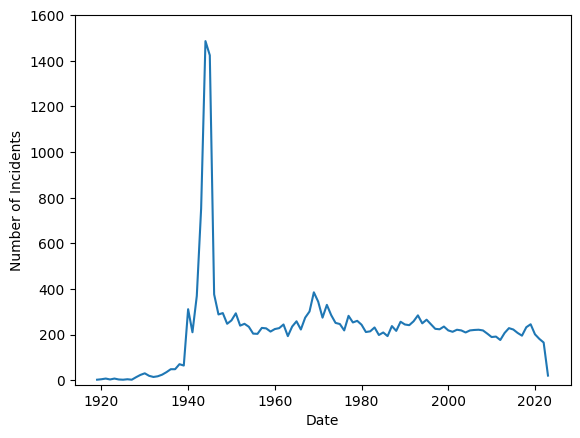

In [ ]:
acc.groupby(acc['date'].dt.year).count()

acc_by_year = acc.groupby(acc['date'].dt.year).size()
acc_by_year.plot()
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.ylim([-20, 1600])

### Number of Incidents by Airplane Type

<Axes: xlabel='type'>

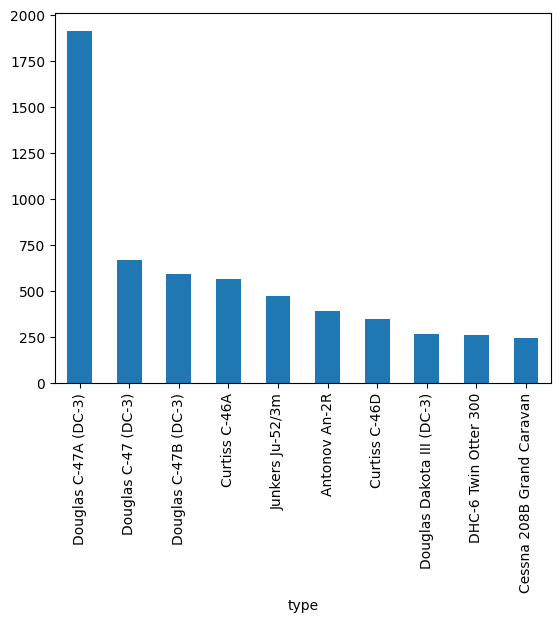

In [ ]:
acc_by_type = acc.groupby('type').size().nlargest(10)
acc_by_type.plot(kind='bar')

### Percentage Total of Incidents by Country

country
USA                18.275703
Russia              5.945562
Unknown country     3.528871
U.K.                3.499603
Canada              3.436886
India               2.918426
Brazil              2.546306
France              2.299620
Germany             2.153280
China               2.124012
Name: percent, dtype: float64

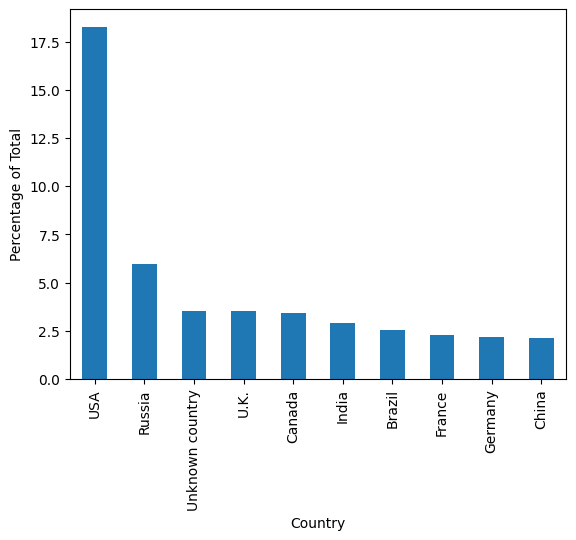

In [ ]:
percentage_incidents = pd.DataFrame(acc, columns = ['country', 'cat']).groupby('country').count()

percentage_incidents['cat'] = pd.to_numeric(percentage_incidents['cat'], errors='coerce')
percentage_incidents['percent'] = (percentage_incidents['cat']/percentage_incidents['cat'].sum()*100)

perc_by_country = percentage_incidents.groupby('country')['percent'].sum().nlargest(10)
perc_by_country.plot(kind='bar', xlabel='Country', ylabel='Percentage of Total')
percentage_incidents.groupby('country')['percent'].sum().nlargest(10)

### Percentage Total of Fatalities by Country

country
USA               11.949399
Russia             7.808863
Colombia           2.707337
France             2.687455
India              2.597984
Brazil             2.559047
Atlantic Ocean     2.402472
Indonesia          2.288148
Spain              2.284005
China              2.161396
Name: percent, dtype: float64

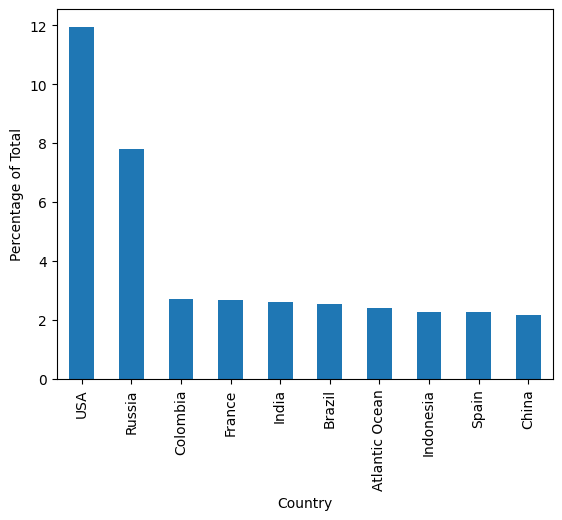

In [ ]:
perc_by_country = percentage_fatalities.groupby('country')['percent'].sum().nlargest(10)
perc_by_country.plot(kind='bar', xlabel='Country', ylabel='Percentage of Total')

percentage_fatalities.groupby('country')['percent'].sum().nlargest(10)

## Conclusions

Total number of fatalities is 120709 and the total number of incidents is 23917. The highest number of incidents occured in USA, Russia and Canada. The highest number of fatalities belong to USA, Russia and Colombia, whereas the highest number of incidents belong to USA, Russia and UK. The most common airplane type invovled in incidents are Douglas C-47A (DC-3), 
Douglas C-47 (DC-3) and Douglas C-47B (DC-3). 